Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [236]:
discentes_df = pd.read_csv('discentes.csv').drop_duplicates()
docentes_df = pd.read_csv('docentes.csv').drop_duplicates()
producao_df = pd.read_csv('producao.csv').drop_duplicates()
trabalhos_df = pd.read_csv('trabalhos.csv').drop_duplicates()

qualis_df = pd.read_excel('Qualis CC 2013-2016.xlsx').drop_duplicates()

In [237]:
trabalhos_df.ies.unique()

array(['PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JANEIRO',
       'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE DO SUL',
       'UNIVERSIDADE FEDERAL FLUMINENSE',
       'UNIVERSIDADE FEDERAL DE MINAS GERAIS',
       'UNIVERSIDADE FEDERAL DE PERNAMBUCO',
       'UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL',
       'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO',
       'UNIVERSIDADE ESTADUAL DE CAMPINAS',
       'UNICAMP_CIENCIA_DA_COMPUTACAO_33003017005P8_7_2017_1.html',
       'UNICAMP_CIENCIA_DA_COMPUTACAO_33003017005P8_7_2017_2.html',
       'UNIVERSIDADE DE SÃO PAULO',
       'USP_SC_CIENCIAS_DA_COMPUTACAO_E_MATEMATICA_COMPUTACIONAL_33002045004P1_7_2017_1.html',
       'UNIVERSIDADE DE SÃO PAULO ( SÃO CARLOS )',
       'USP_SC_CIENCIAS_DA_COMPUTACAO_E_MATEMATICA_COMPUTACIONAL_33002045004P1_7_2017_2.html'],
      dtype=object)

In [515]:
# Função para adicionar siglas aos dataframes
ies_to_short = {
    "PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JANEIRO": "PUC-Rio",
    'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JANEIRO (PUC-RIO)': "PUC-Rio",
    
    "PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE DO SUL": "PUC/RS",
    'PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE DO SUL (PUC/RS)': "PUC/RS",
    
    "UNIVERSIDADE FEDERAL FLUMINENSE": "UFF",
    'UNIVERSIDADE FEDERAL FLUMINENSE (UFF)':"UFF",
    
    "UNIVERSIDADE FEDERAL DE MINAS GERAIS": "UFMG",
    'UNIVERSIDADE FEDERAL DE MINAS GERAIS (UFMG)': "UFMG",
    
    "UNIVERSIDADE FEDERAL DE PERNAMBUCO": "UFPE",
    'UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE)': "UFPE",
    
    "UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL": "UFRGS",
    'UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL (UFRGS)': "UFRGS",
    
    "UNIVERSIDADE FEDERAL DO RIO DE JANEIRO": "UFRJ",
    'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO (UFRJ)': "UFRJ",
    
    "UNIVERSIDADE ESTADUAL DE CAMPINAS": "Unicamp",
    'UNIVERSIDADE ESTADUAL DE CAMPINAS (UNICAMP)': "Unicamp",
    'UNICAMP_CIENCIA_DA_COMPUTACAO_33003017005P8_7_2017_1.html': "Unicamp",
    'UNICAMP_CIENCIA_DA_COMPUTACAO_33003017005P8_7_2017_2.html': "Unicamp",
    
    "UNIVERSIDADE DE SÃO PAULO": "USP",
    'UNIVERSIDADE DE SÃO PAULO (USP)': "USP",
    
    "UNIVERSIDADE DE SÃO PAULO ( SÃO CARLOS )": "USP/SC",
    'UNIVERSIDADE DE SÃO PAULO ( SÃO CARLOS ) (USP/SC)': "USP/SC",
    'USP_SC_CIENCIAS_DA_COMPUTACAO_E_MATEMATICA_COMPUTACIONAL_33002045004P1_7_2017_1.html': "USP/SC",
    'USP_SC_CIENCIAS_DA_COMPUTACAO_E_MATEMATICA_COMPUTACIONAL_33002045004P1_7_2017_2.html': "USP/SC"
}

def addIesShort ( dataFrame , iesColName = 'ies' , shortColName = 'ies_sigla'):
    dataFrame[shortColName] = dataFrame[iesColName]
    dataFrame.replace( {shortColName: ies_to_short } , inplace=True ) 

In [240]:
# Adicionando sigla das instituições
addIesShort( discentes_df )
addIesShort( docentes_df )
addIesShort( producao_df )
addIesShort( trabalhos_df )

In [173]:
discentes_df.ies_sigla.unique()

array(['PUC-Rio', 'PUC/RS', 'UFF', 'UFMG', 'UFPE', 'UFRGS', 'UFRJ',
       'Unicamp', 'USP', 'USP-São Carlos', nan], dtype=object)

In [174]:
docentes_df.ies_sigla.unique()

array(['PUC-Rio', 'PUC/RS', 'UFF', 'UFMG', 'UFPE', 'UFRGS', 'UFRJ',
       'Unicamp', 'USP', 'USP-São Carlos'], dtype=object)

In [175]:
docentes_df.ies_sigla.unique()

array(['PUC-Rio', 'PUC/RS', 'UFF', 'UFMG', 'UFPE', 'UFRGS', 'UFRJ',
       'Unicamp', 'USP', 'USP-São Carlos'], dtype=object)

In [176]:
docentes_df.ies_sigla.unique()

array(['PUC-Rio', 'PUC/RS', 'UFF', 'UFMG', 'UFPE', 'UFRGS', 'UFRJ',
       'Unicamp', 'USP', 'USP-São Carlos'], dtype=object)

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [242]:
docentes_df.head()

,categoria,ies,nome,prof_id,ies_sigla
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079,PUC-Rio
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076,PUC-Rio
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077,PUC-Rio
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074,PUC-Rio
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093,PUC-Rio


In [243]:
docentes_df.categoria.value_counts()

PERMANENTE     431
COLABORADOR     56
Name: categoria, dtype: int64

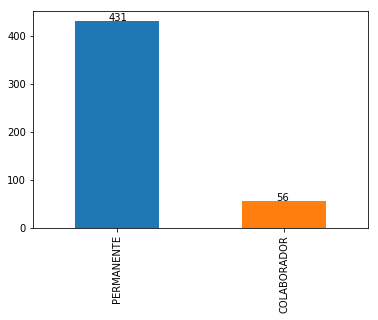

In [244]:
plot = docentes_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(docentes_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')


In [246]:
discentes_prof_df = discentes_df[['orientador', 'ies_sigla']] 
discentes_prof_df = discentes_prof_df.groupby(['orientador', 'ies_sigla']).size().to_frame().reset_index()
discentes_prof_df = discentes_prof_df[['orientador', 'ies_sigla']]

In [247]:
discentes_prof_df.orientador.describe()

count                      458
unique                     458
top       MARCO SERPA MOLINARO
freq                         1
Name: orientador, dtype: object

In [248]:
# Professores que nao possuem alunos cadastrados
docentes_df[~docentes_df.nome.isin(discentes_df.orientador.unique())]

,categoria,ies,nome,prof_id,ies_sigla
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093,PUC-Rio
35,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,JORGE LUIS NICOLAS AUDY,86202,PUC/RS
50,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,ALINE MARINS PAES,152411,UFF
55,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,BRUNO LOPES VIEIRA,152538,UFF
101,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,CRISTIANO ARBEX VALLE,172391,UFMG
127,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,NEWTON JOSE VIEIRA,49000,UFMG
167,COLABORADOR,UNIVERSIDADE FEDERAL DE PERNAMBUCO,EDSON COSTA DE BARROS CARVALHO FILHO,31315,UFPE
179,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,GUSTAVO HENRIQUE PORTO DE CARVALHO,169215,UFPE
207,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,PEDRO MACHADO MANHAES DE CASTRO,111945,UFPE
236,PERMANENTE,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,ANDRE GRAHL PEREIRA,166203,UFRGS


In [249]:
docentes_prof_categ_df = docentes_df[['categoria', 'nome']]

In [250]:
docentes_prof_categ_df.head()

,categoria,nome
0,PERMANENTE,ALBERTO BARBOSA RAPOSO
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA
2,COLABORADOR,ANTONIO LUZ FURTADO
3,PERMANENTE,ARNDT VON STAA
4,PERMANENTE,BRUNO FEIJO


In [251]:
discentes_categ_df = pd.merge(docentes_prof_categ_df, discentes_prof_df, left_on='nome', right_on='orientador')
discentes_categ_df = discentes_categ_df[['categoria', 'nome', 'ies_sigla']]
discentes_categ_df.head()

,categoria,nome,ies_sigla
0,PERMANENTE,ALBERTO BARBOSA RAPOSO,PUC-Rio
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA,PUC-Rio
2,COLABORADOR,ANTONIO LUZ FURTADO,PUC-Rio
3,PERMANENTE,ARNDT VON STAA,PUC-Rio
4,PERMANENTE,CARLOS JOSE PEREIRA DE LUCENA,PUC-Rio


In [252]:
profs_permanentes = discentes_categ_df[discentes_categ_df.categoria=='PERMANENTE'].ies_sigla.value_counts().sort_index()
profs_permanentes

PUC-Rio           23
PUC/RS            23
UFF               39
UFMG              47
UFPE              68
UFRGS             52
UFRJ              26
USP               34
USP-São Carlos    63
Unicamp           41
Name: ies_sigla, dtype: int64

In [253]:
profs_colaboradores = discentes_categ_df[discentes_categ_df.categoria=='COLABORADOR'].ies_sigla.value_counts().sort_index()
profs_colaboradores

PUC-Rio            1
UFF                1
UFMG               5
UFPE              14
UFRGS              3
UFRJ               2
USP                4
USP-São Carlos     6
Unicamp            6
Name: ies_sigla, dtype: int64

In [254]:
# Adiciona valor 0 para categorias que nao possuem colaboradores
for ies_s in set( profs_permanentes.keys() ).difference(set(profs_colaboradores.keys()) ):
   profs_colaboradores[ies_s] = 0 

profs_colaboradores = profs_colaboradores.sort_index()
profs_colaboradores

PUC-Rio            1
PUC/RS             0
UFF                1
UFMG               5
UFPE              14
UFRGS              3
UFRJ               2
USP                4
USP-São Carlos     6
Unicamp            6
Name: ies_sigla, dtype: int64

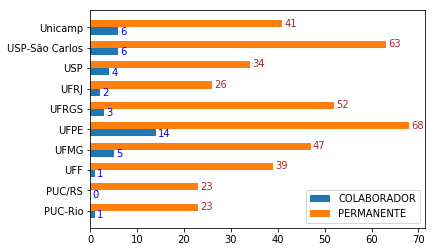

In [256]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_categ_df.ies_sigla.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, profs_colaboradores, width)

plt2 = ax.barh(ind+width/2, profs_permanentes, width)

# Etiquetas COLABORADOR
for i, v in enumerate(profs_colaboradores):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas PERMANENTE
for i, v in enumerate(profs_permanentes):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_yticks(ind)
ax.set_yticklabels(discentes_categ_df.ies_sigla.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['COLABORADOR', 'PERMANENTE'])

plt.show()

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [257]:
discentes_df.head()

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao,ies_sigla
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO,PUC-Rio
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO,PUC-Rio
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO,PUC-Rio
3,"GUEDES, A. L. V. (Principal) GUEDES, ALAN LIVI...",INFORMÁTICA,12/03/2013,Não,565354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAN LIVIO VASCONCELOS GUEDES,SIMONE DINIZ JUNQUEIRA BARBOSA,"[{'nome': 'SIMONE DINIZ JUNQUEIRA BARBOSA', 'c...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO,PUC-Rio
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO,PUC-Rio


In [258]:
discentes_df.nivel.unique()

array(['Mestrado', 'Doutorado', 'Graduação'], dtype=object)

In [259]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "ies_sigla"]]
discentes_pos_df.nivel.value_counts()

Mestrado     1789
Doutorado    1647
Name: nivel, dtype: int64

In [260]:
discentes_pos_df.ies_sigla.unique()

array(['PUC-Rio', 'PUC/RS', 'UFF', 'UFMG', 'UFPE', 'UFRGS', 'UFRJ',
       'Unicamp', 'USP', 'USP-São Carlos'], dtype=object)

In [261]:
# Mestrado
alunos_mestrado = discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].ies_sigla.value_counts().sort_index()
alunos_mestrado

PUC-Rio           115
PUC/RS            137
UFF               168
UFMG              239
UFPE              337
UFRGS             194
UFRJ              110
USP               133
USP-São Carlos    173
Unicamp           183
Name: ies_sigla, dtype: int64

In [262]:
# Doutorado
alunos_doutorado = discentes_pos_df[discentes_pos_df.nivel=='Doutorado'].ies_sigla.value_counts().sort_index()
alunos_doutorado

PUC-Rio           102
PUC/RS             91
UFF               114
UFMG              174
UFPE              379
UFRGS             125
UFRJ               63
USP               111
USP-São Carlos    319
Unicamp           169
Name: ies_sigla, dtype: int64

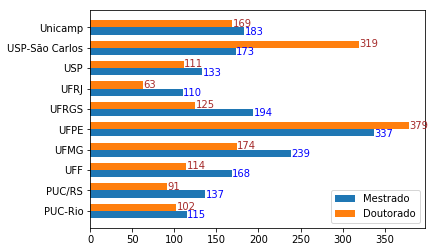

In [263]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_pos_df.ies_sigla.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, alunos_mestrado, width)

plt2 = ax.barh(ind+width/2, alunos_doutorado, width)

# Etiquetas Mestrado
for i, v in enumerate(alunos_mestrado):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate(alunos_doutorado):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_yticks(ind)
ax.set_yticklabels(discentes_pos_df.ies_sigla.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?


In [264]:
taxa_df = pd.DataFrame({'Taxa Mestrado': alunos_mestrado/profs_permanentes,
                        'Taxa Doutorado': alunos_doutorado/profs_permanentes}, index=alunos_mestrado.keys())
taxa_df.index.name = 'Categoria'

taxa_df

,Taxa Doutorado,Taxa Mestrado
Categoria,,
PUC-Rio,4.434783,5.000000
PUC/RS,3.956522,5.956522
UFF,2.923077,4.307692
UFMG,3.702128,5.085106
UFPE,5.573529,4.955882
UFRGS,2.403846,3.730769
UFRJ,2.423077,4.230769
USP,3.264706,3.911765
USP-São Carlos,5.063492,2.746032


4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

In [265]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "ies_sigla","orientador"]]

docentes_pos_df = docentes_df[["nome"]]

docentes_alunos_df = pd.merge( docentes_pos_df , discentes_pos_df , left_on='nome' , right_on='orientador' )
docentes_alunos_df = docentes_alunos_df[["nome", "nivel","ies_sigla"]]
docentes_alunos_df.head()

,nome,nivel,ies_sigla
0,ALBERTO BARBOSA RAPOSO,Mestrado,PUC-Rio
1,ALBERTO BARBOSA RAPOSO,Doutorado,PUC-Rio
2,ALBERTO BARBOSA RAPOSO,Mestrado,PUC-Rio
3,ALBERTO BARBOSA RAPOSO,Mestrado,PUC-Rio
4,ALBERTO BARBOSA RAPOSO,Doutorado,PUC-Rio


In [266]:
# Agrupando e contabilizando alunos por professor por nivel
docentes_alunos_grouped_df = docentes_alunos_df.groupby(['nome','nivel'],).count().reset_index()
docentes_alunos_grouped_df.columns = ['professor','nivel','alunos']

docentes_alunos_grouped_df.head()

,professor,nivel,alunos
0,ABEL GUILHERMINO DA SILVA FILHO,Doutorado,9
1,ABEL GUILHERMINO DA SILVA FILHO,Mestrado,4
2,ADENILSO DA SILVA SIMAO,Doutorado,7
3,ADRIANA SANTAROSA VIVACQUA,Doutorado,1
4,ADRIANA SANTAROSA VIVACQUA,Mestrado,7


In [267]:
# Transformando linhas do "nivel" em colunas de "nivel" ( oposto de melt )
docentes_alunos_table = docentes_alunos_grouped_df.pivot_table(
            index=['professor'], 
            columns=['nivel'],
            values='alunos',
            aggfunc=np.sum).fillna(0)


In [268]:
# Readicionando os professores sem alunos ( foram perdidos no merge )
set_docentes_totais = set(docentes_df.nome)
set_docentes_comalunos = set(docentes_alunos_df.nome)
set_docentes_semalunos = set_docentes_totais - set_docentes_comalunos

docentes_semalunos_df = pd.DataFrame( index = list(set_docentes_semalunos) )
docentes_semalunos_df.index.name = 'professor'

docentes_alunos_table = docentes_alunos_table.append( docentes_semalunos_df ).fillna(0)

In [269]:
# Ajustando valores numericos e adicionando coluna "TOTAL"
docentes_alunos_table.Doutorado = docentes_alunos_table.Doutorado.astype(int)
docentes_alunos_table.Mestrado = docentes_alunos_table.Mestrado.astype(int)

docentes_alunos_table['Total'] = docentes_alunos_table['Doutorado'] + docentes_alunos_table['Mestrado']

docentes_alunos_table.head()

,Doutorado,Mestrado,Total
professor,,,
ABEL GUILHERMINO DA SILVA FILHO,9,4,13
ADENILSO DA SILVA SIMAO,7,0,7
ADRIANA SANTAROSA VIVACQUA,1,7,8
ADRIANO ALONSO VELOSO,5,7,12
ADRIANO AUGUSTO DE MORAES SARMENTO,0,2,2


In [270]:
# Sumário 
docentes_alunos_table.describe()

,Doutorado,Mestrado,Total
count,487.000000,487.000000,487.000000
mean,3.293634,3.379877,6.673511
std,2.879261,2.614742,4.269494
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,3.000000,3.000000,7.000000
75%,5.000000,5.000000,10.000000
max,16.000000,16.000000,23.000000


In [271]:
# TODO: Reprenta graficamente
# Ideia: Eixo X: Quantidade de alunos, Eixo Y: Quantidade de Professores

qtd_professores_por_alunos = docentes_alunos_table['Total'].reset_index()
qtd_professores_por_alunos = qtd_professores_por_alunos.groupby('Total').count()

qtd_professores_por_alunos

,professor
Total,
0,29
1,27
2,46
3,27
4,38
5,44
6,29
7,42
8,40


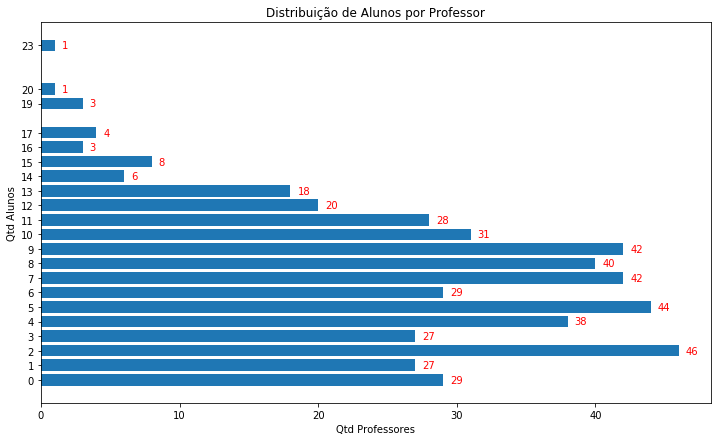

In [272]:
fig, ax = plt.subplots()


plt.barh( qtd_professores_por_alunos.index , qtd_professores_por_alunos.professor  )
plt.yticks( qtd_professores_por_alunos.index , qtd_professores_por_alunos.index )

for i, v in enumerate(qtd_professores_por_alunos.index ):
    ax.text( qtd_professores_por_alunos.iloc[i]['professor'] + 0.5 ,
            v, 
            str(qtd_professores_por_alunos.iloc[i]['professor']), 
            color='red', 
            fontweight='regular',
            va='center')

plt.title( "Distribuição de Alunos por Professor")

plt.xlabel("Qtd Professores")
plt.ylabel("Qtd Alunos")

fig.set_size_inches(12, 7)

plt.show()

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [273]:
trabalhos_df.head()

,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies,keywords,linha,orientador,paginas,palavras_chave,programa,projeto_pesquisa,resumo,tipo,titulo,trabalho_id,volume,ies_sigla
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",MARKUS ENDLER,121.0,Aglomeração Espacial;Aglomeração em Fluxo de D...,INFORMÁTICA (31005012004P9),-,"Clusters (ou concentrações) de objetos móveis,...",TESE,DG2CEP: An On-line Algorithm for Real-time Det...,5013040,1,PUC-Rio
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,59.0,Processamento de Linguagem Natural;Extração de...,INFORMÁTICA (31005012004P9),-,A Extração de Citações consiste na identificaç...,DISSERTAÇÃO,Direct and Indirect Quotation Extraction for P...,5013130,1,PUC-Rio
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,96.0,Aprendizado de Máquina;Processamento de Imagen...,INFORMÁTICA (31005012004P9),-,A classificação de imagens em contexto real é ...,DISSERTAÇÃO,Classificação de Objetos em Contexto Real por ...,5013137,1,PUC-Rio
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,RUY LUIZ MILIDIU,68.0,Aprendizado de máquina;Processamento de lingua...,INFORMÁTICA (31005012004P9),-,A Extração e Atribuição de Citações é a tarefa...,DISSERTAÇÃO,Deep Architecture for Quotation Extraction,5017265,1,PUC-Rio
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,MARKUS ENDLER,102.0,Detecção online de anomalia;processamento de e...,INFORMÁTICA (31005012004P9),-,Dirigir é uma tarefa diária que permite uma lo...,TESE,Detecção móvel e online de anomalia em múltipl...,5017316,1,PUC-Rio


In [274]:
trabalhos_categ_df = trabalhos_df.copy() 

trabalhos_categ_df['categoria'] = trabalhos_categ_df.apply(
    lambda row: 'Mestrado' if row['tipo'] == 'DISSERTAÇÃO' else 'Doutorado', axis=1
)

In [275]:
trabalhos_categ_df.categoria.value_counts()

Mestrado     357
Doutorado    285
Name: categoria, dtype: int64

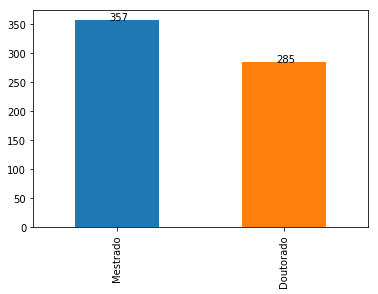

In [276]:
plot = trabalhos_categ_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(trabalhos_categ_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [277]:
# Inspecionando os dados
q06_inspect = trabalhos_df[trabalhos_df.tipo.isin(["TESE", "DISSERTAÇÃO"])]
q06_inspect = q06_inspect[["tipo", "area"]]

sorted( q06_inspect.area.unique() )

['-',
 'ALGORITMOS E OTIMIZAÇÃO',
 'ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS',
 'BANCO DE DADOS',
 'BANCOS DE DADOS',
 'CIENCIA DA COMPUTACAO',
 'CIÊNCIA DA COMPUTAÇÃO',
 'CIÊNCIAS  DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL',
 'COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA',
 'COMPUTAÇÃO GRÁFICA',
 'COMPUTAÇÃO INTELIGENTE',
 'COMPUTAÇÃO VISUAL',
 'Ciência de Dados e Engenharia de Software',
 'Computação Visual',
 'ENGENHARIA DA COMPUTAÇÃO',
 'ENGENHARIA DA INFORMAÇÃO',
 'ENGENHARIA DE SISTEMAS E INFORMAÇÃO',
 'ENGENHARIA DE SOFTWARE',
 'ENGENHARIA DE SOFTWARE E LINGUAGENS DE PROGRAMAÇÃO',
 'HIPERTEXTO E MULTIMÍDIA',
 'INTELIGÊNCIA COMPUTACIONAL',
 'INTERAÇÃO HUMANO-COMPUTADOR',
 'Inteligência Artificial',
 'LINGUAGENS DE PROGRAMAÇÃO',
 'OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO',
 'Projeto de Sistemas Eletrônicos e Computacionais',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUIDOS',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS',
 'Redes de Computadores',
 'SISTEMAS DE COMPUTAÇÃO',
 'Sis

In [278]:
# Removendo erros de tipagem!
areaRenameDict = {
    'BANCO DE DADOS': 'BANCOS DE DADOS',
    'CIENCIA DA COMPUTACAO': 'CIÊNCIA DA COMPUTAÇÃO',
    'Teoria da Computação': 'TEORIA DA COMPUTAÇÃO',
    'Computação Visual': 'COMPUTAÇÃO VISUAL',
    'REDES DE COMPUTADORES E SISTEMAS DISTRIBUIDOS': 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS',
    'Sistemas de Computação': 'SISTEMAS DE COMPUTAÇÃO'
}

q06_inspect.replace( {'area': areaRenameDict } , inplace=True ) 
    
sorted( q06_inspect.area.unique() )

['-',
 'ALGORITMOS E OTIMIZAÇÃO',
 'ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS',
 'BANCOS DE DADOS',
 'CIÊNCIA DA COMPUTAÇÃO',
 'CIÊNCIAS  DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL',
 'COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA',
 'COMPUTAÇÃO GRÁFICA',
 'COMPUTAÇÃO INTELIGENTE',
 'COMPUTAÇÃO VISUAL',
 'Ciência de Dados e Engenharia de Software',
 'ENGENHARIA DA COMPUTAÇÃO',
 'ENGENHARIA DA INFORMAÇÃO',
 'ENGENHARIA DE SISTEMAS E INFORMAÇÃO',
 'ENGENHARIA DE SOFTWARE',
 'ENGENHARIA DE SOFTWARE E LINGUAGENS DE PROGRAMAÇÃO',
 'HIPERTEXTO E MULTIMÍDIA',
 'INTELIGÊNCIA COMPUTACIONAL',
 'INTERAÇÃO HUMANO-COMPUTADOR',
 'Inteligência Artificial',
 'LINGUAGENS DE PROGRAMAÇÃO',
 'OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO',
 'Projeto de Sistemas Eletrônicos e Computacionais',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS',
 'Redes de Computadores',
 'SISTEMAS DE COMPUTAÇÃO',
 'TEORIA DA COMPUTAÇÃO']

In [279]:
# Preparando os dados
q06_trabalhos_programa = q06_inspect[["tipo", "area"]]
q06_trabalhos_programa = q06_trabalhos_programa.sort_index()

q06_trabalhos_tese = q06_trabalhos_programa[q06_trabalhos_programa.tipo == "TESE"]
q06_trabalhos_tese = q06_trabalhos_tese.groupby('area').count()
q06_trabalhos_tese.columns = ['teses']

q06_trabalhos_dissertacao = q06_trabalhos_programa[q06_trabalhos_programa.tipo == "DISSERTAÇÃO"]
q06_trabalhos_dissertacao = q06_trabalhos_dissertacao.groupby('area').count()
q06_trabalhos_dissertacao.columns = ['dissertacoes']

In [280]:
# Une os dataframes em um unico dataframe. Motivo: certificar-se de q todas as entradas existem para todas a areas.
q06_trabalhos = q06_trabalhos_tese.append(q06_trabalhos_dissertacao)
q06_trabalhos = q06_trabalhos.fillna(0)
q06_trabalhos = q06_trabalhos.sort_index()

q06_trabalhos = q06_trabalhos.groupby(level=0).sum()
q06_trabalhos.dissertacoes = q06_trabalhos.dissertacoes.astype(int)
q06_trabalhos.teses = q06_trabalhos.teses.astype(int)

q06_trabalhos

,dissertacoes,teses
area,,
-,4,1
ALGORITMOS E OTIMIZAÇÃO,4,5
ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS,1,2
BANCOS DE DADOS,10,6
CIÊNCIA DA COMPUTAÇÃO,143,54
CIÊNCIAS DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL,27,43
COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA,0,1
COMPUTAÇÃO GRÁFICA,6,0
COMPUTAÇÃO INTELIGENTE,14,21


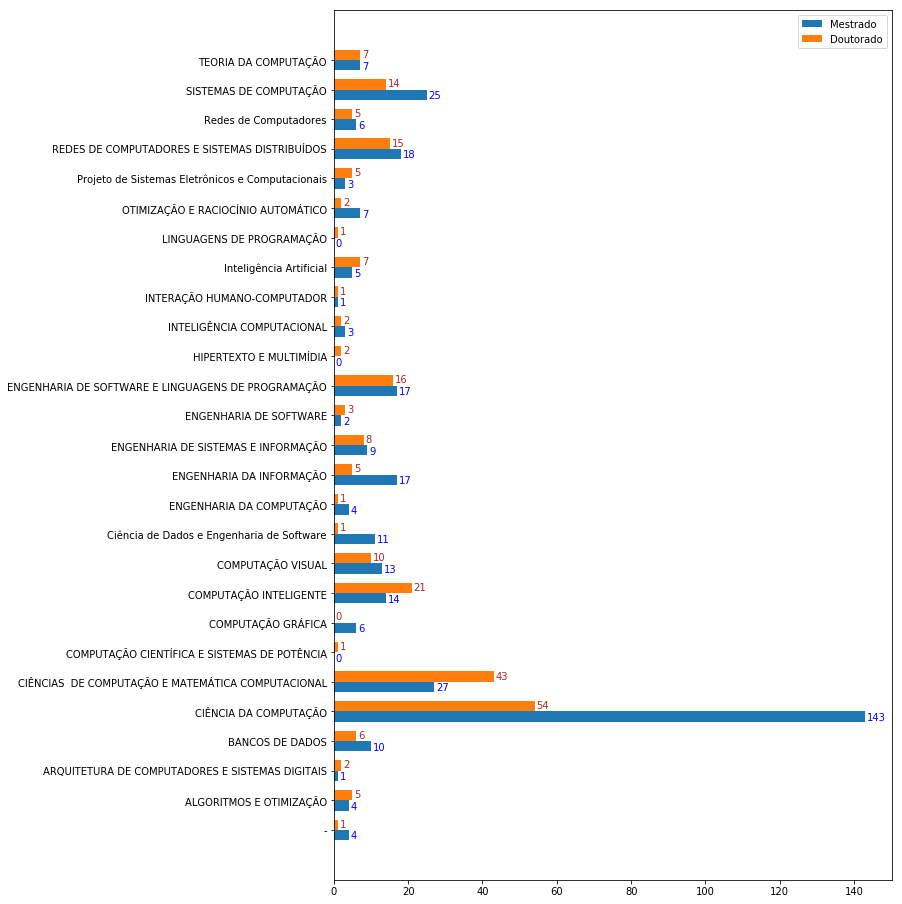

In [281]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q06_trabalhos.index))

plt1 = ax.barh(ind-width/2, q06_trabalhos.dissertacoes, width)
plt2 = ax.barh(ind+width/2, q06_trabalhos.teses, width)

# Etiquetas Mestrado
for i, v in enumerate( q06_trabalhos.dissertacoes ):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate( q06_trabalhos.teses ):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')


ax.set_yticks(ind)
ax.set_yticklabels(q06_trabalhos.index)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

fig.set_size_inches(10, 16)

plt.show()

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

In [282]:
trabalhos_categ_df["data_defesa"] = pd.to_datetime(trabalhos_categ_df["data_defesa"])
trabalhos_categ_df = trabalhos_categ_df[["data_defesa", "categoria"]]

In [283]:
# Mestrado
trabalhos_mestrado = trabalhos_categ_df[trabalhos_categ_df.categoria == "Mestrado"].data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count()

trabalhos_mestrado

data_defesa
1.0     12
2.0     34
3.0     72
4.0     29
5.0     18
6.0     26
7.0     33
8.0     38
9.0     24
10.0    18
11.0    28
12.0    25
Name: data_defesa, dtype: int64

In [284]:
# Doutorao
trabalhos_doutorado = trabalhos_categ_df[trabalhos_categ_df.categoria == "Doutorado"].data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count()

trabalhos_doutorado

data_defesa
1.0      9
2.0     21
3.0     27
4.0      9
5.0     17
6.0     19
7.0     15
8.0     31
9.0     22
10.0    20
11.0    19
12.0    29
Name: data_defesa, dtype: int64

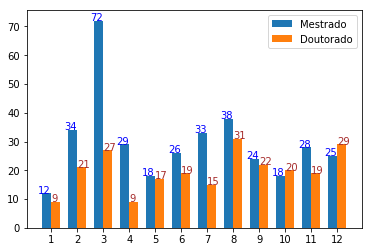

In [285]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(trabalhos_categ_df.data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count().keys()))

plt1 = ax.bar(ind-width/2, trabalhos_mestrado, width)

plt2 = ax.bar(ind+width/2, trabalhos_doutorado, width)

# Etiquetas Mestrado
for i, v in enumerate(trabalhos_mestrado):
    ax.text(i-0.5,
            v + 1, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate(trabalhos_doutorado):
    ax.text(i,
            v + 1, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_xticks(ind)
ax.set_xticklabels(ind+1)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

In [286]:
# Obtendo total de alunos por programa
q08_alunos_programa_mestrado = discentes_df[discentes_df.nivel.isin(["Mestrado"])]
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado[['ies_sigla','nivel']]
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado.groupby('ies_sigla').count()
q08_alunos_programa_mestrado.columns = ['alunos']
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado.sort_index().reset_index()

q08_alunos_programa_doutorado = discentes_df[discentes_df.nivel.isin(["Doutorado"])]
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado[['ies_sigla','nivel']]
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado.groupby('ies_sigla').count()
q08_alunos_programa_doutorado.columns = ['alunos']
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado.sort_index().reset_index()

In [287]:
# Preparando os dados dos trabalhos
q08_trabalhos_programa = trabalhos_df[trabalhos_df.tipo.isin(["TESE", "DISSERTAÇÃO"])]
q08_trabalhos_programa = q08_trabalhos_programa[["tipo", "ies_sigla"]]

q08_trabalhos_tese = q08_trabalhos_programa[q08_trabalhos_programa.tipo == "TESE"]
q08_trabalhos_tese = q08_trabalhos_tese.groupby('ies_sigla').count()
q08_trabalhos_tese.columns = ['trabalhos']
q08_trabalhos_tese = q08_trabalhos_tese.sort_index().reset_index()

q08_trabalhos_dissertacao = q08_trabalhos_programa[q08_trabalhos_programa.tipo == "DISSERTAÇÃO"]
q08_trabalhos_dissertacao = q08_trabalhos_dissertacao.groupby('ies_sigla').count()
q08_trabalhos_dissertacao.columns = ['trabalhos']
q08_trabalhos_dissertacao = q08_trabalhos_dissertacao.sort_index().reset_index()


In [288]:
# Atualizado para valores relativos ( fracao )
q08_trabalhos_dissertacao['alunos'] = q08_alunos_programa_mestrado.alunos
q08_trabalhos_dissertacao['fracao'] = q08_trabalhos_dissertacao.trabalhos / q08_alunos_programa_mestrado.alunos

q08_trabalhos_tese['alunos'] = q08_alunos_programa_doutorado.alunos
q08_trabalhos_tese['fracao'] = q08_trabalhos_tese.trabalhos / q08_alunos_programa_doutorado.alunos


In [290]:
q08_trabalhos_dissertacao

,ies_sigla,trabalhos,alunos,fracao
0,PUC-Rio,22,115,0.191304
1,PUC/RS,25,137,0.182482
2,UFF,25,168,0.148810
3,UFMG,65,239,0.271967
4,UFPE,65,337,0.192878
5,UFRGS,41,194,0.211340
6,UFRJ,20,110,0.181818
7,USP,36,133,0.270677
8,USP-São Carlos,27,173,0.156069
9,Unicamp,31,183,0.169399


In [291]:
q08_trabalhos_tese

,ies_sigla,trabalhos,alunos,fracao
0,PUC-Rio,17,102,0.166667
1,PUC/RS,19,91,0.208791
2,UFF,27,114,0.236842
3,UFMG,10,174,0.057471
4,UFPE,59,379,0.155673
5,UFRGS,28,125,0.224000
6,UFRJ,7,63,0.111111
7,USP,18,111,0.162162
8,USP-São Carlos,44,319,0.137931
9,Unicamp,9,169,0.053254


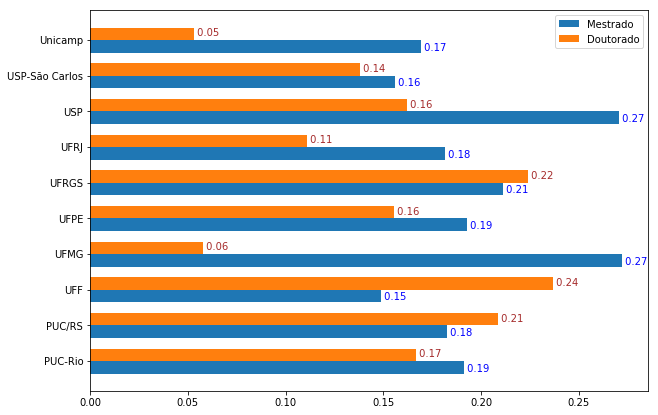

In [293]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q08_trabalhos_tese.index))

plt1 = ax.barh(ind-width/2, q08_trabalhos_dissertacao.fracao, width)
plt2 = ax.barh(ind+width/2, q08_trabalhos_tese.fracao, width)

# Etiquetas Mestrado
for i, v in enumerate( q08_trabalhos_dissertacao.fracao ):
    ax.text( v,
            i - 0.2, 
            " {:.2f}".format(v), 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Etiquetas Doutorado
for i, v in enumerate( q08_trabalhos_tese.fracao ):
    ax.text( v,
            i + 0.2, 
            " {:.2f}".format(v), 
            color='brown', 
            fontweight='regular',
            va='center',
            ha='left' )
               


ax.set_yticks(ind)
ax.set_yticklabels(q08_trabalhos_tese.ies_sigla)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

fig.set_size_inches(10, 7)

plt.show()

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

In [294]:
pd.options.display.max_columns = 40
producao_df.head()

,anais_titulo,ano,area,cidade,dict_paper_autores,divulgacao,doi,edicao,editora,evento,fasciculo,idioma,ies,issn,issn_isbn,linha,natureza,num_discentes,num_docentes,num_externos,obs,pagina_final,pagina_inicial,pais,paper_autores,paper_id,periodico,programa,projeto,serie,subtipo,tipo,titulo,url,volume,ies_sigla
0,NaN,2017,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,New York,"[{'nome': 'BERTO DE TACIO PEREIRA GOMES', 'cat...",MEIO DIGITAL,DOI: 10.1002/cpe.4043,NaN,Wiley,NaN,11,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,1532-0634,NaN,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,Completo,0,1,4,First online Dec 2016,19,1,NaN,"['BERTO DE TACIO PEREIRA GOMES', 'LUIZ CARLOS ...",5583631,(1532-0634) CONCURRENY AND COMPUTATION (ONLINE),INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A COMPREHENSIVE AND SCALABLE MIDDLEWARE FOR AM...,http://onlinelibrary.wiley.com/doi/10.1002/cpe...,29,PUC-Rio
1,Proceedings of XVI Brazilian Symposium of Comp...,2017,COMPUTAÇÃO GRÁFICA,Curitiba,"[{'nome': 'PEDRO IGOR PORFIRIO SAMPAIO', 'cate...",MEIO DIGITAL,NaN,16,NaN,Simposio Brasileiro de Jogos e Entretenimento ...,-,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,NaN,-,"JOGOS, VFX E ENTRETENIMENTO DIGITAL",TRABALHO COMPLETO,1,1,2,-,8,1,Brasil,"['PEDRO IGOR PORFIRIO SAMPAIO', 'AUGUSTO CESAR...",5310280,NaN,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,TRABALHO EM ANAIS,BIBLIOGRÁFICA,A FAST APPROACH FOR AUTOMATIC GENERATION OF PO...,http://https://www.sbgames.org/sbgames2017/pap...,1,PUC-Rio
2,NaN,2017,NaN,NaN,"[{'nome': 'MARCIO RICARDO ROSEMBERG', 'categor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,NaN,NaN,NaN,Série de Relatórios de Pesquisa: Monografias e...,1,2,0,NaN,NaN,NaN,NaN,"['MARCIO RICARDO ROSEMBERG', 'DANIEL SCHWABE',...",5733069,NaN,INFORMÁTICA (31005012004P9),NaN,NaN,OUTRO,BIBLIOGRÁFICA,A HYBRID BLOCK AND STREAM CIPHER ENCRYPTION AL...,NaN,NaN,PUC-Rio
3,NaN,2017,TEORIA DA COMPUTAÇÃO,Amsterdam,"[{'nome': 'FREDERICO GALAXE PAES', 'categoria'...",MEIO DIGITAL,10.1016/j.ejor.2016.07.022,NaN,Elsevier,NaN,3,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,0377-2217,NaN,ALGORITMOS E COMPLEXIDADE,Completo,0,1,2,-,756,742,NaN,"['FREDERICO GALAXE PAES', 'ARTUR ALVES PESSOA'...",5653523,(0377-2217) EUROPEAN JOURNAL OF OPERATIONAL RE...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A HYBRID GENETIC ALGORITHM WITH DECOMPOSITION ...,https://www.sciencedirect.com/science/article/...,256,PUC-Rio
4,NaN,2017,NÃO INFORMADA,-,"[{'nome': 'LUIS PAULO SANTOS VALENTE', 'catego...",MEIO DIGITAL,10.1007/s00779-017-1107-0,NaN,-,NaN,-,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,1617-4909,NaN,NÃO INFORMADA,Completo,0,2,2,-,24,1,NaN,"['LUIS PAULO SANTOS VALENTE', 'BRUNO FEIJO', '...",6293392,(1617-4909) PERSONAL AND UBIQUITOUS COMPUTING ...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A METHOD TO ASSESS PERVASIVE QUALITIES IN MOBI...,[doi:10.1007/s00779-017-1107-0],21,PUC-Rio


In [295]:
# Cria dataframe para anais e outro pra periodicos
producao_anais_df = producao_df[producao_df.subtipo == 'TRABALHO EM ANAIS']
producao_periodicos_df = producao_df[producao_df.subtipo == 'ARTIGO EM PERIÓDICO']

In [298]:
trabalhos_anais = producao_anais_df.ies_sigla.value_counts().sort_index()
trabalhos_anais

PUC-Rio            83
PUC/RS            145
UFF               131
UFMG              226
UFPE              208
UFRGS             153
UFRJ               81
USP                91
USP-São Carlos    230
Unicamp           156
Name: ies_sigla, dtype: int64

In [299]:
artigos_periodicos = producao_periodicos_df.ies_sigla.value_counts().sort_index()
artigos_periodicos

PUC-Rio            54
PUC/RS             38
UFF                62
UFMG               86
UFPE              101
UFRGS              76
UFRJ               41
USP                65
USP-São Carlos    140
Unicamp            84
Name: ies_sigla, dtype: int64

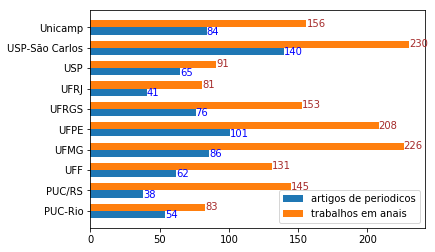

In [300]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(artigos_periodicos.keys()))

plt1 = ax.barh(ind-width/2, artigos_periodicos, width)

plt2 = ax.barh(ind+width/2, trabalhos_anais, width)

# Etiquetas artigos de periodicos
for i, v in enumerate( artigos_periodicos ):
    ax.text( v,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Etiquetas trabalhos em anais
for i, v in enumerate( trabalhos_anais ):
    ax.text( v,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center',
            ha='left' )

ax.set_yticks(ind)
ax.set_yticklabels(artigos_periodicos.keys())

plt.legend([plt1[0], plt2[0]], ['artigos de periodicos', 'trabalhos em anais'])

plt.show()

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

In [303]:
# Docentes Permanentes por Programa
q10_docentes = docentes_df[docentes_df.categoria.isin(["PERMANENTE"])]
q10_docentes = q10_docentes[["nome"]]

q10_discentes = discentes_df[["ies_sigla","orientador"]]

q10_docentes = pd.merge( docentes_pos_df , discentes_pos_df , left_on='nome' , right_on='orientador' )
q10_docentes = q10_docentes[["nome", "ies_sigla"]]
q10_docentes.head()

q10_docentes_programa = q10_discentes.groupby('ies_sigla').count()
q10_docentes_programa.columns = ['docentes']

q10_docentes_programa

,docentes
ies_sigla,
PUC-Rio,173
PUC/RS,222
UFF,170
UFMG,413
UFPE,715
UFRGS,319
UFRJ,160
USP,242
USP-São Carlos,492


In [305]:
# Artigos em anais
q10_anais = producao_df[producao_df.subtipo.isin(['TRABALHO EM ANAIS'])]
q10_anais = q10_anais[['ies_sigla','paper_id']]

q10_anais['ies_sigla'] = q10_anais.apply(
    lambda row: row['ies_sigla'].replace(' (', '('), axis=1 )

q10_anais = q10_anais.groupby('ies_sigla').count()
q10_anais.columns = ['papers']

q10_anais

,papers
ies_sigla,
PUC-Rio,83
PUC/RS,145
UFF,131
UFMG,226
UFPE,208
UFRGS,153
UFRJ,81
USP,91
USP-São Carlos,230


In [524]:
# Une os dataframes em um unico dataframe. Motivo: certificar-se de q todas as entradas existem para todas os programas.
q10_estatisticas = q10_docentes_programa.append(q10_anais)
q10_estatisticas = q10_estatisticas.fillna(0)
q10_estatisticas = q10_estatisticas.sort_index()

q10_estatisticas = q10_estatisticas.groupby(level=0).sum()
q10_estatisticas.docentes = q10_estatisticas.docentes.astype(int)
q10_estatisticas.papers = q10_estatisticas.papers.astype(int)

q10_estatisticas['taxa'] = q10_estatisticas['papers'] / q10_estatisticas['docentes']

q10_estatisticas.index.name = "programa"

q10_estatisticas = q10_estatisticas.sort_values( ['taxa'] , ascending  = False )

q10_estatisticas

,docentes,papers,taxa
programa,,,
UFF,170,131,0.770588
PUC/RS,222,145,0.653153
UFMG,413,226,0.547215
UFRJ,160,81,0.506250
PUC-Rio,173,83,0.479769
UFRGS,319,153,0.479624
USP-São Carlos,492,230,0.467480
Unicamp,344,156,0.453488
USP,242,91,0.376033


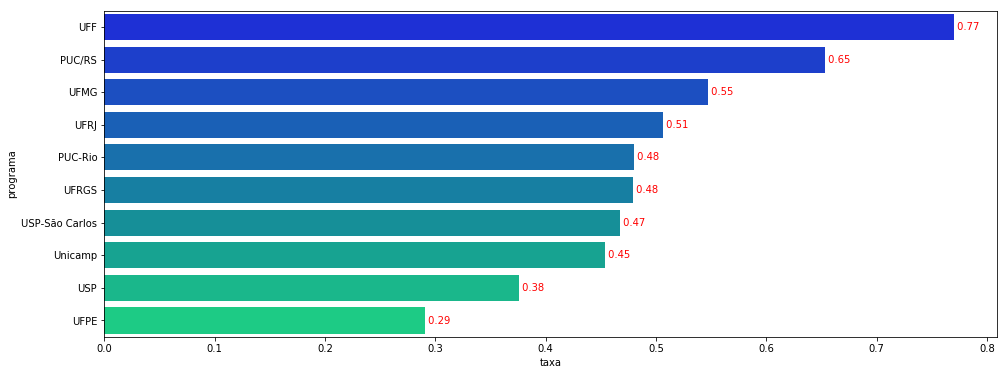

In [525]:
# Plotando resultados
subDim = (2,5)
fig, ax = plt.subplots( figsize=(16, 6) )

# Etiquetas
for i, v in enumerate( q10_estatisticas.taxa ):
    ax.text( v,
            i, 
            " {:.2f}".format(v), 
            color='red', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Plota as Barras
sns.barplot(
    y=q10_estatisticas.index,
    x="taxa",
    data=q10_estatisticas,
    palette= "winter",
    ax=ax)



11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?


In [308]:
# trabalhos em anais com coautoria/ total trabalhos em anais
producao_anais_df[producao_anais_df.num_discentes > 0].shape[0]/producao_anais_df.shape[0]

0.7227393617021277

In [309]:
# artigos de periodicos com coautoria/ total artigos de periodicos
producao_periodicos_df[producao_periodicos_df.num_discentes > 0].shape[0]/producao_periodicos_df.shape[0]

0.4350736278447122

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

In [310]:
# trabalhos em anais com coautoria/ total trabalhos em anais
producao_anais_df[producao_anais_df.num_externos > 0].shape[0]/producao_anais_df.shape[0]

0.7101063829787234

In [311]:
# artigos de periodicos com coautoria/ total artigos de periodicos
producao_periodicos_df[producao_periodicos_df.num_externos > 0].shape[0]/producao_periodicos_df.shape[0]

0.8835341365461847

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

In [312]:
qualis_df.head()

,ISSN,Título,Estrato
0,0360-0300,ACM COMPUTING SURVEYS,A1
1,0730-0301,ACM TRANSACTIONS ON GRAPHICS,A1
2,0098-3500,ACM TRANSACTIONS ON MATHEMATICAL SOFTWARE,A1
3,0254-5330,ANNALS OF OPERATION RESEARCH,A1
4,1572-9338,ANNALS OF OPERATIONS RESEARCH (DORDRECHT. ONLINE),A1


In [313]:
qualis_df.Estrato.unique()

array(['A1', 'A2', 'B1', 'B2', 'B3', 'B4', 'B5', 'C '], dtype=object)

In [326]:
producao_periodicos_issn_df = producao_periodicos_df[['issn']]
qualis_producao_df = pd.merge(producao_periodicos_issn_df, qualis_df, left_on='issn', right_on='ISSN')
qualis_producao_df = qualis_producao_df[['ISSN','Estrato']]
qualis_producao_df = qualis_producao_df.drop_duplicates( ['ISSN'] )
qualis_producao_df.head()

,ISSN,Estrato
0,1532-0634,A2
1,0377-2217,A1
6,1617-4909,A2
8,1424-8220,A1
11,0177-0667,B1


In [327]:
estratos = qualis_producao_df.Estrato.value_counts().sort_index()
estratos

A1    63
A2    62
B1    88
B2    13
B3    27
B4     5
B5    25
C     17
Name: Estrato, dtype: int64

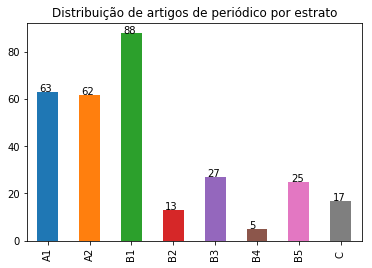

In [328]:
plot = estratos.plot('bar', title='Distribuição de artigos de periódico por estrato')

for idx, value in enumerate(list(estratos)): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?


In [345]:
# Obtendo Periodicos por programa com seus Estratos
q14_periodicos = producao_periodicos_df[['issn','ies_sigla']]
q14_producao_qualis = pd.merge(q14_periodicos, qualis_df, left_on='issn', right_on='ISSN')
q14_producao_qualis = q14_producao_qualis[['ies_sigla','ISSN','Estrato']]
q14_producao_qualis = q14_producao_qualis.drop_duplicates( ['ISSN'] )
q14_producao_qualis.head()

,ies_sigla,ISSN,Estrato
0,PUC-Rio,1532-0634,A2
1,PUC-Rio,0377-2217,A1
6,PUC-Rio,1617-4909,A2
8,PUC-Rio,1424-8220,A1
11,PUC-Rio,0177-0667,B1


In [360]:
# Agrupando por programa e estrato
q14_programa_estrato = q14_producao_qualis.groupby(['ies_sigla','Estrato'],).count().reset_index()
q14_programa_estrato.columns = ['programa','estrato','periodicos']

q14_programa_estrato.head()

,programa,estrato,periodicos
0,PUC-Rio,A1,7
1,PUC-Rio,A2,10
2,PUC-Rio,B1,9
3,PUC-Rio,B3,5
4,PUC-Rio,B5,3


In [374]:
# Funcao que aplica o calculo
def fatorPonderado( row ):
    periodicos = row['periodicos']
    fator = fatorPonderado_peso_por_estratos[row['estrato']]
    docentes = fatorPonderado_docentes_por_prograna[row['programa']]
    return periodicos * fator / docentes

In [361]:
# Dict de docentes permantes por programa
q14_docentes_permanentes_dict = dict(profs_permanentes )


In [371]:
# Dicionario de Pesos
q14_pesos_dict = {'A1': 1.0, 'A2': 0.85, 'B1': 0.70, 'B2': 0.0, 'B3': 0.0, 'B4': 0.0, 'B5': 0.0, 'C ': 0.0}


In [382]:
# Calcula o DF ponderado
fatorPonderado_peso_por_estratos = q14_pesos_dict
fatorPonderado_docentes_por_prograna = q14_docentes_permanentes_dict

q14_programa_ponderado = q14_programa_estrato.copy()
q14_programa_ponderado['fator_ponderado'] = q14_programa_ponderado.apply( fatorPonderado , axis = 1)
q14_programa_ponderado.drop( 'periodicos' , axis = 1 , inplace = True )
q14_programa_ponderado.head()

,programa,estrato,fator_ponderado
0,PUC-Rio,A1,0.304348
1,PUC-Rio,A2,0.369565
2,PUC-Rio,B1,0.273913
3,PUC-Rio,B3,0.000000
4,PUC-Rio,B5,0.000000


In [467]:
# Funcao de plotar um grafico
def multiPlotEstratos( df_ponderado ):
    # Prepara o grafico
    subDim = (2,5)
    fig, axarr = plt.subplots( subDim[0], subDim[1], figsize=(16, 6) , sharex=True , sharey=True )

    # plota os sub graficos
    row = 0
    col = 0
    for programa in df_ponderado.programa.unique():
        # Filtra o DataSet
        df_plot = df_ponderado[ df_ponderado.programa == programa ]
        
        # Define o titulo
        axarr[row][col].set_title(programa)
        
        # Plota as Barras
        sns.barplot(
            y="estrato",
            x="fator_ponderado",
            data=df_plot,
            palette= "Set2",
            ax=axarr[row][col] )
        
        # Controle de posicao
        col += 1
        if col >= subDim[1]:
            row += 1
            col = 0
            
    plt.subplots_adjust(hspace=0.4)


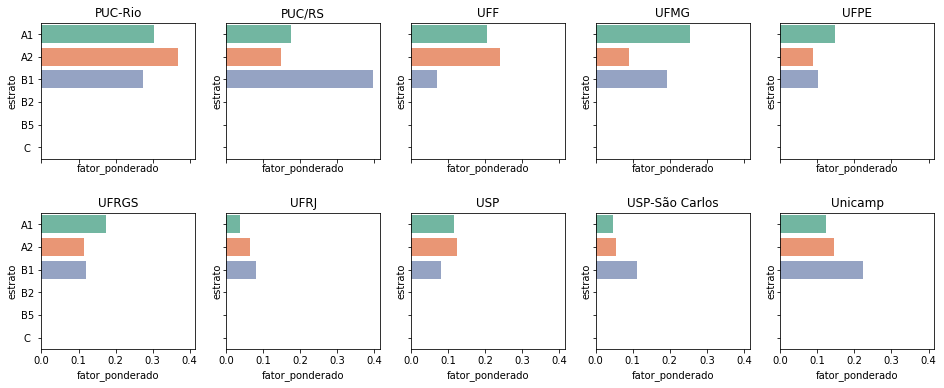

In [468]:
multiPlotEstratos(q14_programa_ponderado)

**15)** Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [471]:
# Dicionario de Pesos
q15_pesos = {'A1': 1.0, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C ': 0.0}

In [472]:
# Calcula o DF ponderado
fatorPonderado_peso_por_estratos = q15_pesos
fatorPonderado_docentes_por_prograna = q14_docentes_permanentes_dict

q15_programa_ponderado = q14_programa_estrato.copy()
q15_programa_ponderado['fator_ponderado'] = q15_programa_ponderado.apply( fatorPonderado , axis = 1)
q15_programa_ponderado.drop( 'periodicos' , axis = 1 , inplace = True )
q15_programa_ponderado.head()

,programa,estrato,fator_ponderado
0,PUC-Rio,A1,0.304348
1,PUC-Rio,A2,0.369565
2,PUC-Rio,B1,0.273913
3,PUC-Rio,B3,0.043478
4,PUC-Rio,B5,0.006522


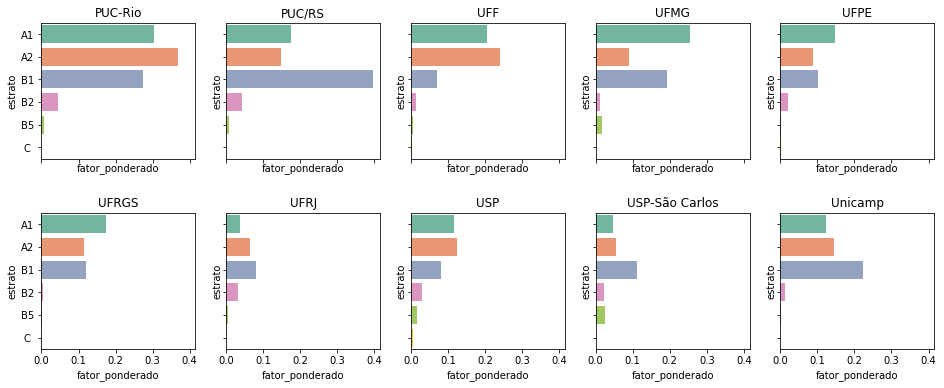

In [473]:
# Plota Resultados
multiPlotEstratos(q15_programa_ponderado)

**15) Extra 1)** Soma dos valores de cada estrado - já ponderado pelos pesos e docentes - por programa

In [475]:
q15e1_programa_ponderado = q15_programa_ponderado.groupby(['programa']).sum().reset_index()

q15e1_programa_ponderado

,programa,fator_ponderado
0,PUC-Rio,0.997826
1,PUC/RS,0.767391
2,UFF,0.541026
3,UFMG,0.573404
4,UFPE,0.364706
5,UFRGS,0.413462
6,UFRJ,0.219231
7,USP,0.377941
8,USP-São Carlos,0.266667
9,Unicamp,0.503659


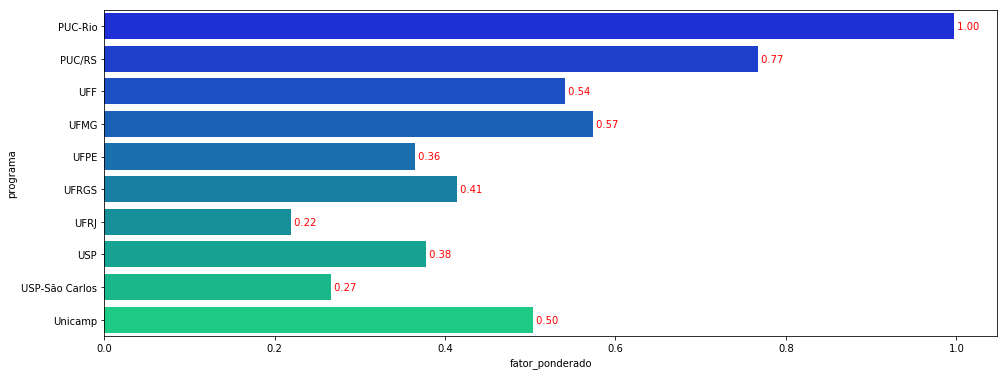

In [514]:
# Plotando resultados
subDim = (2,5)
fig, ax = plt.subplots( figsize=(16, 6) )

# Etiquetas nas barras
for i, v in enumerate( q15e1_programa_ponderado.programa ):
    ax.text( q15e1_programa_ponderado.iloc[i].fator_ponderado,
            i, 
            " {:.2f}".format( q15e1_programa_ponderado.iloc[i].fator_ponderado ), 
            color='red', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Plota as Barras
sns.barplot(
    y="programa",
    x="fator_ponderado",
    data=q15e1_programa_ponderado,
    palette= "winter",
    ax=ax)

